In [1]:
import numpy as np

# Question 0) Implementation des perceptrons batch and online(incrementale)

In [2]:
def perceptron_version_batch(P, N, X, TAU, alpha):
    #initialisation des Poids
    Weight = np.random.uniform(-1,1,(N+1,1))
    #print('le poid d initialisrion est :','\n', Weight)
    DeltaWeight = np.zeros((N+1,1))
    X = np.append(np.ones((P,1)),X,axis=1)  
    IT=0
    while True:  
        IT+=1
        Y = np.sign(np.dot(X,Weight))
        if np.array_equal(Y,TAU) is True:
            break
            #ajustements des poids
        else:
            DeltaWeight = alpha*(np.dot(X.T,(TAU - Y)))
            Weight = Weight + DeltaWeight
            #print('Le nouveau poid w est :','\n', Weight)
        
    return Weight,IT

In [3]:
def perceptron_version_online(P, N, X, tau, alpha):
    # Initialisation des poids 
    Weight = np.random.uniform(-1,1,(N+1,1))
    #print('le poid d initialisrion est :','\n', Weight)
    DeltaWeight = np.zeros((N+1,1))
    ones = np.ones((P,1))
    X = np.append(ones,X,axis=1)
    stop = False
    IT = 0
    while not stop:
        for k in range(P):
            IT += 1
            y = np.sign(np.dot(X[k],Weight))
            if y != tau[k]:
                #ajustements des poids
                DeltaWeight = alpha*(tau[k] - y)*X[k].reshape((N+1,1))
                Weight = Weight + DeltaWeight
                #print('Le nouveau poid w est :','\n', Weight)
            # verifiation si les données ont été bien classifié
            if np.array_equal(np.sign(X@Weight),tau):
                stop = True
                break
            
            
    return Weight, IT

# Ensemble d'apprentissage : fonction 'OU', 'ET' et exemple du cours

In [4]:
P = 4 # nombre de points
N = 2 # entree binaire
alpha = 1

# données d'entrainement
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
TAU_ET = np.array([[-1],[-1],[-1],[1]])
TAU_OU = np.array([[-1],[1],[1],[1]])
#exemple fait en cours : Fichier Perceptron Page 42
P_Ex = 6
X_Ex = np.array([[5,-1],[2,6],[3, 3],[2, 1],[-1,1],[1,-2]])
TAU_Ex = np.array([[1],[1],[1],[-1],[-1],[-1]])

# Apprentissage version batch

In [5]:
Weight_ET, IT_ET = perceptron_version_batch(P, N, X, TAU_ET, alpha)
print('Le poid de convergence Weight_ET est alors :','\n', Weight_ET, '\n','IT_ET :',IT_ET,'\n')
Weight_OU, IT_OU = perceptron_version_batch(P, N, X, TAU_OU, alpha)
print('Le poid de convergence Weight_OU est alors :','\n', Weight_OU, '\n','IT_OU :',IT_OU,'\n')
Weight_Ex, IT_Ex = perceptron_version_batch(P_Ex, N, X_Ex, TAU_Ex, alpha)
print('Le poid de convergence Weight_Exemple est alors :','\n', Weight_Ex, '\n', 'IT_Ex :',IT_Ex,'\n')

Le poid de convergence Weight_ET est alors : 
 [[-0.4104516 ]
 [ 0.80277714]
 [ 0.94537963]] 
 IT_ET : 1 

Le poid de convergence Weight_OU est alors : 
 [[3.06724055]
 [3.04433407]
 [0.59078215]] 
 IT_OU : 2 

Le poid de convergence Weight_Exemple est alors : 
 [[-11.03346333]
 [  3.34596287]
 [  0.80448745]] 
 IT_Ex : 9 



# Utilisation de matplotlib pour afficher notre resultats 

In [6]:
import matplotlib.pyplot as plt

In [7]:
def plot_decision(X, TAU, Weight, title):
    unique = np.unique(TAU)
    for k in unique:
        X_new = X[TAU.squeeze()==k]
        plt.scatter(X_new[:,0],X_new[:,1])
    #la resolution de l'equation mX+c = wX nous permet de trouver m et c
    x1 =[min(X[:,0]),max(X[:,0])] 
    m = -(Weight[0]/Weight[2])/(Weight[0]/Weight[1]) 
    c = -Weight[0]/Weight[2]
    x2= x1*m+c
    plt.plot(x1,x2,'y-')
    plt.title(title)
    plt.show()

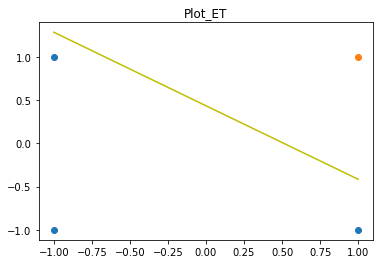

None


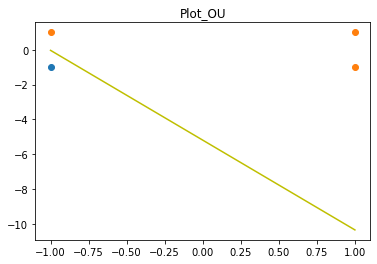

None


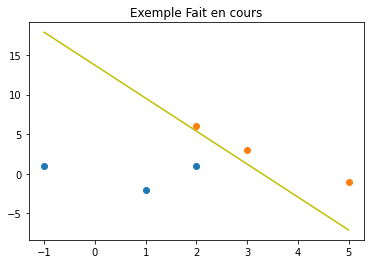

None


In [8]:
print(plot_decision(X,TAU_ET,Weight_ET,'Plot_ET'))
print(plot_decision(X,TAU_OU,Weight_OU,'Plot_OU'))
print(plot_decision(X_Ex,TAU_Ex,Weight_Ex,'Exemple Fait en cours'))


# Apprentissage version Online

In [9]:
Weight_ET, IT_ET = perceptron_version_online(P, N, X, TAU_ET, alpha)
print('Le poid de convergence Weight_ET est alors : :','\n', Weight_ET, '\n','IT_ET :',IT_ET,'\n')
Weight_OU, IT_OU = perceptron_version_online(P, N, X, TAU_OU, alpha)
print('Le poid de convergence Weight_OU est alors : :','\n', Weight_OU, '\n','IT_OU :',IT_OU,'\n')
Weight_Ex, IT_Ex = perceptron_version_online(P_Ex, N, X_Ex, TAU_Ex, alpha)
print('Le poid de convergence Weight_Exemple est alors : :','\n', Weight_Ex, '\n', 'IT_Exemple :',IT_Ex,'\n')

Le poid de convergence Weight_ET est alors : : 
 [[-2.0352838 ]
 [ 1.62519236]
 [ 2.83239728]] 
 IT_ET : 4 

Le poid de convergence Weight_OU est alors : : 
 [[0.85584064]
 [3.53779336]
 [3.05376378]] 
 IT_OU : 5 

Le poid de convergence Weight_Exemple est alors : : 
 [[-17.23547877]
 [  7.27049473]
 [  1.22735737]] 
 IT_Exemple : 76 



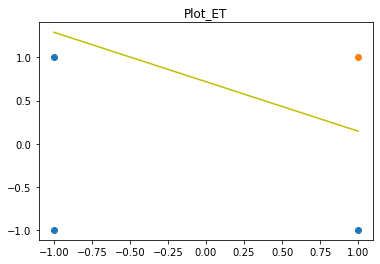

None


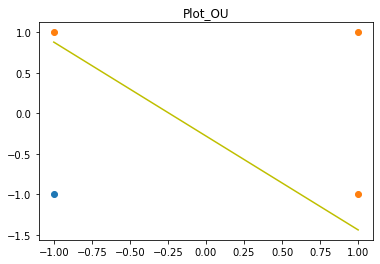

None


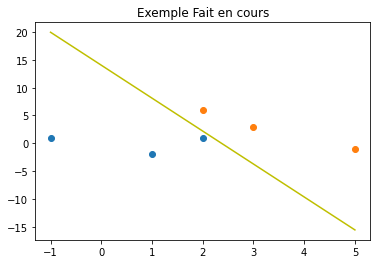

None


In [10]:
print(plot_decision(X,TAU_ET,Weight_ET,'Plot_ET'))
print(plot_decision(X,TAU_OU,Weight_OU,'Plot_OU'))
print(plot_decision(X_Ex,TAU_Ex,Weight_Ex,'Exemple Fait en cours'))

# Question 1) Données LS Aleatoire : Perceptron Professeur W*

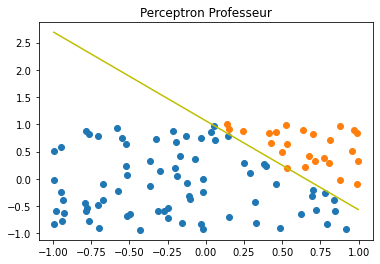

In [11]:
P=100
N=2
while True:
    X=np.random.uniform(-1,1,(P,N))
    Weight = np.random.uniform(-1,1,(N+1,1))
    ones = np.ones((P,1))
    X = np.append(ones,X,axis=1)
    tau = np.sign(X@Weight)
    if len(np.unique(tau)==1) :
        break
    
plot_decision(X[:,1:],tau,Weight,'Perceptron Professeur')

# Question 2) Apprentissage 

In [12]:
W_version_batch_eleve,IT_version_batch = perceptron_version_batch(P, N, X[:,1:], tau, alpha)


In [13]:
W_version_online_eleve,IT_version_online = perceptron_version_online(P, N, X[:,1:], tau, alpha)

# 2-a) Poids W du perceptron élève

In [14]:
print("Le poids W de convergence version batch est : ", "\n", W_version_batch_eleve )
print("Le poids W de convergence version online est : ","\n", W_version_online_eleve )

Le poids W de convergence version batch est :  
 [[-45.93736765]
 [ 70.29965506]
 [ 42.8178451 ]]
Le poids W de convergence version online est :  
 [[-10.87164412]
 [ 16.78814855]
 [ 10.22737464]]


# 2-b) Le nombre d'itérations IT nécessaires pour converger

In [15]:
print("Le nombre d'itérations IT nécessaires pour converger, version batch est : ",IT_version_batch )
print("Le nombre d'itérations IT nécessaires pour converger, version online est : ",IT_version_online )

Le nombre d'itérations IT nécessaires pour converger, version batch est :  76
Le nombre d'itérations IT nécessaires pour converger, version online est :  3296


# 2-c) Le recouvrement R entre le perceptron professeur W* et l’élève W

In [16]:
def recouvrement(w_etoile,w):
    norm_w_etoile=np.linalg.norm(w_etoile)
    norm_w= np.linalg.norm(w)
    return np.cos((w_etoile.T@w)/(norm_w_etoile*norm_w))

In [17]:
recov_batch = recouvrement(Weight,W_version_batch_eleve)
recov_batch = (np.squeeze(recov_batch)).squeeze() 
recov_online = recouvrement(Weight,W_version_online_eleve)
recov_online = (np.squeeze(recov_online)).squeeze()
print("le recouvrement entre professeur et éléve version batch : ", recov_batch )
print("le recouvrement entre professeur et éléve version online : " ,recov_online)

le recouvrement entre professeur et éléve version batch :  0.5403047481540322
le recouvrement entre professeur et éléve version online :  0.5403086370516834


# 3) TESTS : Lancer le Programme avec differents  valeur sous forme de tableau

In [18]:
def batch_test(P, N, Nbr_tirage):
    Nbr_IT = 0
    Nbr_Recov = 0
    for i in range(Nbr_tirage):
        X=np.random.uniform(-1,1,(P,N))
        Weight = np.random.uniform(-1,1,(N+1,1))
        ones = np.ones((P,1))
        X = np.append(ones,X,axis=1)
        tau = np.sign(X@Weight)
        W_batch, IT_batch = perceptron_version_batch(P, N, X[:,1:], tau, alpha) # on fait appel à fonction percetron batch
        Nbr_IT += IT_batch 
        Nbr_Recov += recouvrement(Weight, W_batch)
        
    Moy_IT = Nbr_IT/Nbr_tirage
    Moy_recov = Nbr_Recov/Nbr_tirage
    Moy_recov = (np.squeeze(Moy_recov)).squeeze()[()]
    return Moy_IT, Moy_recov

In [19]:
def online_test(P, N, Nbr_tirage):
    Nbr_IT = 0
    Nbr_Recov = 0
    for i in range(Nbr_tirage):
        X=np.random.uniform(-1,1,(P,N))
        Weight = np.random.uniform(-1,1,(N+1,1))
        ones = np.ones((P,1))
        X = np.append(ones,X,axis=1)
        tau = np.sign(X@Weight)
        W_batch, IT_batch = perceptron_version_online(P, N, X[:,1:], tau, alpha) # on fait appel à fonction percetron online
        Nbr_IT += IT_batch 
        Nbr_Recov += recouvrement(Weight, W_batch)
        
    Moy_IT = Nbr_IT/Nbr_tirage
    Moy_recov = Nbr_Recov/Nbr_tirage
    Moy_recov = (np.squeeze(Moy_recov)).squeeze()[()]
    return Moy_IT, Moy_recov

In [20]:
import time

In [21]:
N = [2,10,100,500,1000,5000] 
P = [10,100,500,1000]
Nbr_tirage = 50
print('                   <IT>        <R>')
start_time = time.time()
for i in P :
    for j in N :
        Moy_IT,Moy_recov = batch_test(i,j,Nbr_tirage)
        print('P = ',i,'N = ', j,': ',Moy_IT, ' ; ', Moy_recov)
end_time = time.time()
print('\n',f"Temps d'exécution version batch est : {end_time - start_time} secondes")

                   <IT>        <R>
P =  10 N =  2 :  4.84  ;  0.6652709921935578
P =  10 N =  10 :  4.06  ;  0.8099283035724218
P =  10 N =  100 :  3.32  ;  0.9741312713939765
P =  10 N =  500 :  3.36  ;  0.9952906366415096
P =  10 N =  1000 :  3.32  ;  0.9972606025298931
P =  10 N =  5000 :  3.36  ;  0.9993911029125971
P =  100 N =  2 :  44.46  ;  0.5722216422348013
P =  100 N =  10 :  12.88  ;  0.5570917245786662
P =  100 N =  100 :  6.96  ;  0.7922052750764346
P =  100 N =  500 :  4.92  ;  0.9506968842822271
P =  100 N =  1000 :  4.54  ;  0.9744805761800562
P =  100 N =  5000 :  4.86  ;  0.9947910492908913
P =  500 N =  2 :  85.14  ;  0.5572211862452998
P =  500 N =  10 :  25.0  ;  0.5410023538748294
P =  500 N =  100 :  16.2  ;  0.5828968164913281
P =  500 N =  500 :  10.08  ;  0.7975256970005485
P =  500 N =  1000 :  8.14  ;  0.8849512726310788
P =  500 N =  5000 :  6.0  ;  0.9741141263067605
P =  1000 N =  2 :  415.82  ;  0.5684150183728316
P =  1000 N =  10 :  50.52  ;  0.540553

In [22]:
N = [2,10,100,500,1000,5000] 
P = [10,100,500,1000]
Nbr_tirage = 50
print('                   <IT>        <R>')
start_time = time.time()
for i in P :
    for j in N :
        Moy_IT,Moy_recov = online_test(i,j,Nbr_tirage)
        print('P = ',i,'N = ', j,': ',Moy_IT, ' ; ', Moy_recov)
end_time = time.time()
print('\n',f"Temps d'exécution version online est : {end_time - start_time} secondes")

                   <IT>        <R>
P =  10 N =  2 :  31.26  ;  0.6292216488671475
P =  10 N =  10 :  17.02  ;  0.8290594315523215
P =  10 N =  100 :  13.48  ;  0.9744220409353228
P =  10 N =  500 :  13.04  ;  0.9958369013663096
P =  10 N =  1000 :  13.54  ;  0.9980871119049054
P =  10 N =  5000 :  14.34  ;  0.9995081226834104
P =  100 N =  2 :  1783.58  ;  0.5677645650178773
P =  100 N =  10 :  1968.12  ;  0.5559568194672143
P =  100 N =  100 :  522.88  ;  0.8030318586930657
P =  100 N =  500 :  300.72  ;  0.9566352115159007
P =  100 N =  1000 :  313.16  ;  0.9770138943142506
P =  100 N =  5000 :  305.18  ;  0.9954059130623684
P =  500 N =  2 :  53050.3  ;  0.5510034824693615
P =  500 N =  10 :  102646.74  ;  0.5410246300561138
P =  500 N =  100 :  16324.94  ;  0.5758712619403907
P =  500 N =  500 :  4353.14  ;  0.7982545350245018
P =  500 N =  1000 :  3164.7  ;  0.8911298221059133
P =  500 N =  5000 :  2306.3  ;  0.9771049331786809
P =  1000 N =  2 :  64653.5  ;  0.574060355642549
P =